# 1. 환경설정

## konlpy 패키지 설치
```
pip install konlpy
````

# 2. 한국어 말뭉치

> KoNLPy에서는 대한민국 헌법 말뭉치인 kolaw와 국회법안 말뭉치인 kobill을 제공한다. 각 말뭉치가 포함하는 파일의 이름은 fields 메서드로 알 수 있고 open 메서드로 해당 파일의 텍스트를 읽어들인다.

In [1]:
from konlpy.corpus import kolaw

kolaw.fileids()

['constitution.txt']

In [2]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [3]:
from konlpy.corpus import kobill

kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [4]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


# 3. 단어 추출

- nouns : 명사 추출
- morphs : 형태소 추출
- pos : 품사 부착

## 3.1 한나눔 활용한 명사 추출

In [7]:
c[:40]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로'

In [6]:
from konlpy.tag import Hannanum

#  명사 - nouns
hannanum = Hannanum()
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

## 3.2 꼬꼬마 활용한 명사 추출

In [8]:
from konlpy.tag import Kkma

kkma = Kkma()
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

## 3.3 코모란 활용한 명사 추출

In [9]:
from konlpy.tag import Komoran

komoran = Komoran()
komoran.nouns(c[:40])

['대한민국', '헌법', '역사', '전통', '국민', '운동']

In [10]:
# 빈 라인이 있으면 에러가 발생
komoran.nouns("\n".join([s for s in c[:40].split("\n") if s]))

['대한민국', '헌법', '역사', '전통', '국민', '운동']

> 메뉴얼에서는 위와 같이 사용하길 권고하고 있다.

## 3.4 트위터 활용한 명사 추출

In [11]:
from konlpy.tag import Okt

okt = Okt()
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

> Open Korean Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기

## 3.5 모든 형태소 분석

In [12]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [13]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [14]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

# 4. wordcloud

## 4.1 단어 추출

In [15]:
words = okt.nouns(c)
words[:20]

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주']

In [17]:
len(words)

3882

## 4.2 철자 제한

In [18]:
words_up2 = [n for n in words if len(n) > 1]

## 4.3 단어 세기

In [19]:
from collections import Counter

counts = Counter(words_up2)
noun_list = counts.most_common(40)
noun_list[:20]

[('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('헌법', 53),
 ('모든', 37),
 ('기타', 26),
 ('사항', 23),
 ('권리', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20),
 ('임명', 20),
 ('직무', 19),
 ('국무총리', 19),
 ('경제', 18),
 ('의무', 18),
 ('조직', 18)]

## 4.4 한글 설치

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

## 4.5 wordCloud

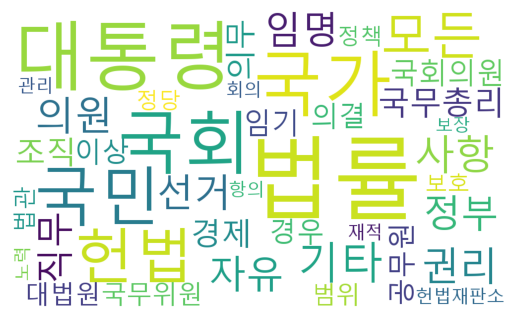

In [24]:
from wordcloud import WordCloud

font_path = 'c:/windows/Fonts/malgun.ttf'

wc = WordCloud(width=1000, height=600, background_color='white', font_path=font_path)
plt.imshow(wc.generate_from_frequencies(dict(noun_list)))
plt.axis('off')
plt.show()

AttributeError: 'Hannanum' object has no attribute 'version_info'